<a href="https://colab.research.google.com/github/manu9sree/Skin-Cancer-Classification-Using-CNN/blob/main/mini_datasets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [ ]:
class_names = ['dermatofibroma', 'squamous cell carcinoma', 'melanoma', 'Nevus pigmentous','healthy skin']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def load_data():
    # Update these paths to point to your datasets in Google Drive
    datasets = [r"/content/drive/My Drive/PROJECTS/IOMP/datasets2/train",
                r"/content/drive/My Drive/PROJECTS/IOMP/datasets2/test"]

    output = []

    for dataset in datasets:
        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

Mounted at /content/drive


In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/My Drive/PROJECTS/IOMP/datasets2/train


100%|██████████| 357/357 [00:17<00:00, 20.49it/s]


Loading /content/drive/My Drive/PROJECTS/IOMP/datasets2/test


100%|██████████| 16/16 [00:10<00:00,  1.55it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1171
Number of testing examples: 80
Each image is of size: (150, 150)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,319,333 (20.29 MB)

 Trainable params: 5,319,333 (20.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.3091 - loss: 4.3100 - val_accuracy: 0.4085 - val_loss: 1.5965
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.3760 - loss: 1.5662 - val_accuracy: 0.4085 - val_loss: 1.3396
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.3941 - loss: 1.3590 - val_accuracy: 0.4596 - val_loss: 1.2717
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.4562 - loss: 1.2653 - val_accuracy: 0.4723 - val_loss: 1.2009
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5114 - loss: 1.1632 - val_accuracy: 0.5872 - val_loss: 1.0981
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5610 - loss: 1.0448 - val_accuracy: 0.5447 - val_loss: 1.0389
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5904 - loss: 0.9556 - val_accuracy: 0.6851 - val_loss: 0.8652
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.6564 - loss: 0.8498 - val_accuracy: 0.6638 - val_loss: 0.8568
Epoch 9/

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.9578 - loss: 0.2207


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step


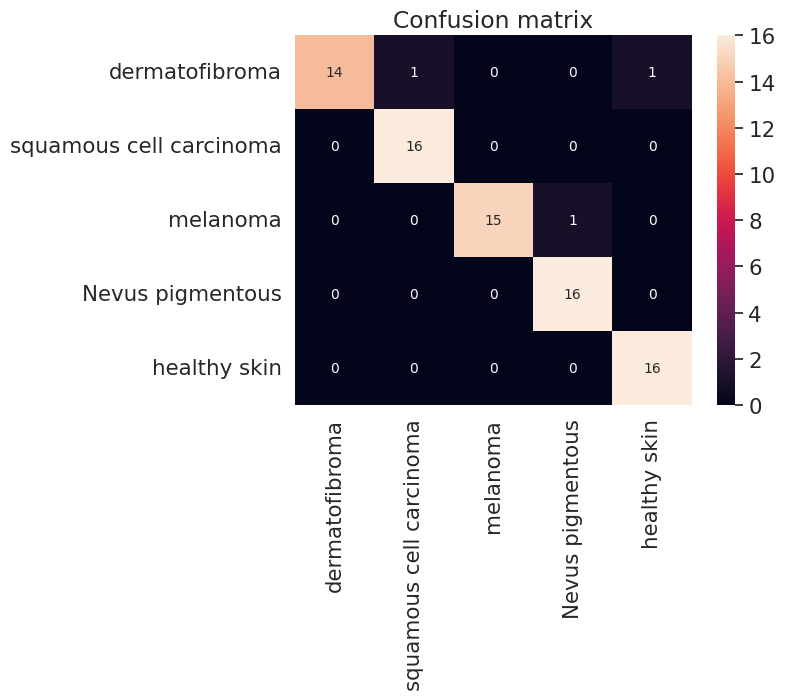

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Precision
precision = precision_score(test_labels, pred_labels, average='weighted')
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(test_labels, pred_labels, average='weighted')
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(test_labels, pred_labels, average='weighted')
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy: {:.2f}".format(accuracy))

Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Accuracy: 0.96


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import cv2
import numpy as np

# Define the prediction function
def predict_skin_cancer(img):
    # Preprocess the image
    img = cv2.resize(img, (150, 150))  # Resize to (150, 150)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 150, 150, 3)

    # Predict the skin condition using the trained model
    predictions = model.predict(img)
    class_idx = np.argmax(predictions[0])  # Get the class with the highest confidence
    confidence = predictions[0][class_idx]  # Get the confidence for the predicted class

    # Handle the prediction result based on the class
    if class_names[class_idx].lower() == "healthy skin":
        return f"The analysis indicates no signs of skin cancer. (Confidence: {confidence:.2f})"
    else:
        return f"The analysis suggests the presence of {class_names[class_idx]}"

# Define Gradio interface
iface = gr.Interface(
    fn=predict_skin_cancer,  # The prediction function
    inputs=gr.Image(type="numpy", label="Upload Skin Image"),  # Image input
    outputs=gr.Textbox(label="Skin Condition Analysis"),  # Textbox for output
    title="Skin Cancer Classifier",  # Title of the interface
    description="Upload an image of a skin lesion to classify if it's healthy or a type of skin cancer."  # Description of the interface
)

# Launch the interface with share=True for Colab compatibility
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ee4e1ad298fa5b17f9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
